# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - Adult Census Quality DataSet

Link:https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Load the Adult Census Dataset and remove missing/malformed data

In [2]:
# Load the Adult Census Dataset from URL
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Open dataset using pandas and specify column headers
df = pd.read_csv(URL, delimiter=",", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

# Remove any rows that have a ? or NaN(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')

# Remove columns (i.e. features) that have majority 0s
del df["capital-gain"]
del df["capital-loss"]

# Display first 10 rows to get a picture of the data
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


## One Hot Encoding

In [4]:
ohe = OneHotEncoder(categories='auto')

# Create the feature array 
feature_arr = ohe.fit_transform(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']]).toarray()
#print(feature_arr)

# Print all the new feature names to make sure they are correct 
feature_names = ohe.get_feature_names(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income'])
#print(feature_names)

# Add the feature names to the columns to check if the encoding is correct and show first 10 rows
df_ohe = pd.DataFrame(feature_arr,columns = feature_names)
df_ohe.head(-10)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
# Have to reset index so that the dataframes are concatonated correctly
df.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)

# Concat the one hot encoded rows to the original data frame
df_concat = pd.concat( [df, df_ohe], axis=1) 
df_concat.head(-10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:
# Replace/delete the categorical columns with the one hot encoded columns
df_final = df_concat.drop(['workclass','fnlwgt','education','marital-status','occupation','relationship','race','sex','native-country','income'],axis = 1)

# Dropping the native countries columns because skewed
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='native-country')))]

# Dropping the race columns because majority are white 
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='race_')))]


df_final.head(10)

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,13,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,50,13,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,38,9,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,53,7,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,37,14,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,49,5,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,52,9,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,31,14,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,42,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Basic stats/ counts for each feature

In [8]:
# Find the basic stats for each feature 
df_concat.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,...,0.000365,0.002354,0.001392,0.000564,0.000597,0.911876,0.002122,0.000530,0.751078,0.248922
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,...,0.019094,0.048461,0.037291,0.023734,0.024422,0.283480,0.046016,0.023026,0.432396,0.432396
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [31]:
# Find the counts for each feature
df_ohe.apply(pd.Series.value_counts)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0.0,29219,28095,7876,29088,27663,28883,30148,29342,29114,29785,...,30151,30091,30120,30145,30144,2658,30098,30146,7508,22654
1.0,943,2067,22286,1074,2499,1279,14,820,1048,377,...,11,71,42,17,18,27504,64,16,22654,7508


## Split dataset into positive and negative classes (>50k and <=50k)

In [9]:
#Split Data between >50k and < 50K income 

# without the categorical data
positive = df_final['income_ >50K'] == 1
pos_data = df_final[positive]
negative = df_final['income_ <=50K'] == 1
neg_data = df_final[negative]

# with categorical data
positive_concat = df_concat['income_ >50K'] == 1
pos_data_concat = df_concat[positive]
negative_concat = df_concat['income_ <=50K'] == 1
neg_data_concat = df_concat[negative]

In [96]:
pos_data.head(10)

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
7,52,9,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,31,14,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,42,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10,37,10,80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11,30,13,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,43,14,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19,40,16,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24,56,13,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
42,57,13,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48,47,15,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
pos_data_concat.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,7508.000000,7508,7.508000e+03,7508,7508.000000,7508,7508,7508,7508,7508,...,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.0,7508.0
unique,NaN,6,NaN,15,NaN,7,14,6,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4876,NaN,2126,NaN,6399,1937,5679,6839,6396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,43.959110,NaN,1.881500e+05,NaN,11.606420,NaN,NaN,NaN,NaN,NaN,...,0.000266,0.001865,0.002531,0.000400,0.000266,0.931673,0.000666,0.000799,0.0,1.0
std,10.269633,NaN,1.028217e+05,NaN,2.368423,NaN,NaN,NaN,NaN,NaN,...,0.016320,0.043145,0.050245,0.019987,0.016320,0.252323,0.025799,0.028260,0.0,0.0
min,19.000000,NaN,1.487800e+04,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,36.000000,NaN,1.191005e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0
50%,43.000000,NaN,1.761850e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0
75%,51.000000,NaN,2.310660e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0


In [131]:
neg_data_concat.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,22654.000000,22654,2.265400e+04,22654,22654.000000,22654,22654,22654,22654,22654,...,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.0,22654.0
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,HS-grad,NaN,Never-married,Adm-clerical,Not-in-family,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17410,NaN,8223,NaN,9256,3223,6903,19094,13984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.608060,NaN,1.903386e+05,NaN,9.629116,NaN,NaN,NaN,NaN,NaN,...,0.000397,0.002516,0.001015,0.000618,0.000706,0.905315,0.002604,0.000441,1.0,0.0
std,13.464631,NaN,1.065713e+05,NaN,2.413596,NaN,NaN,NaN,NaN,NaN,...,0.019928,0.050099,0.031848,0.024852,0.026567,0.292786,0.050968,0.021006,0.0,0.0
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,26.000000,NaN,1.173120e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0
50%,34.000000,NaN,1.795085e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0
75%,45.000000,NaN,2.394390e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0


## Plot the Distributions/ Histograms of Various Features

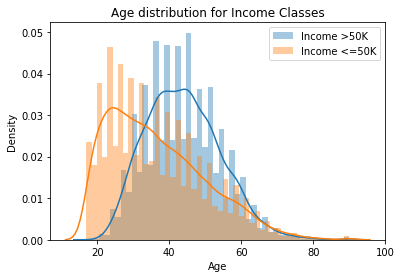

In [135]:
# Age - positive
sns.distplot(pos_data['age'])

# Age - negative
sns.distplot(neg_data['age'])

plt.title('Age distribution for Income Classes')
plt.ylabel('Density')
plt.xlabel('Age')
plt.legend(labels=['Income >50K','Income <=50K'])


Text(0.5, 0, 'Education Level')

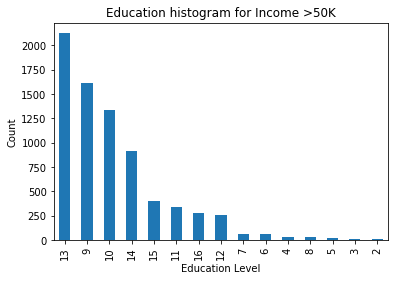

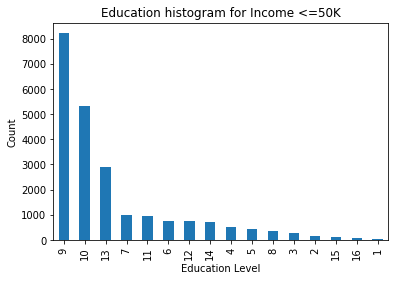

In [154]:
# Education - positive
plt.figure(0)
pos_data_concat['education-num'].value_counts().plot(kind='bar')
plt.title('Education histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Education Level')

# Education - negative
plt.figure(1)
neg_data_concat['education-num'].value_counts().plot(kind='bar')
plt.title('Education histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Education Level')


Text(0.5, 0, 'Marital Status')

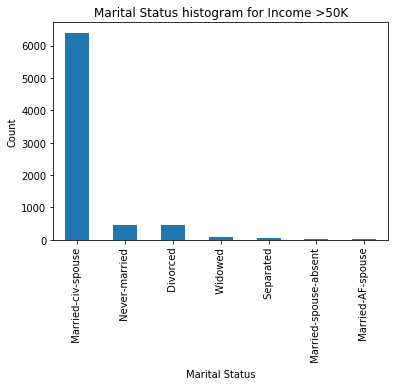

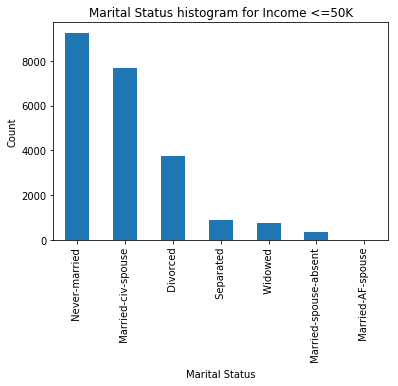

In [87]:
# Marital Sstatus - positive
plt.figure(0)
pos_data_concat['marital-status'].value_counts().plot(kind='bar')
plt.title('Marital Status histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Marital Status')

# Education - negative
plt.figure(1)
neg_data_concat['marital-status'].value_counts().plot(kind='bar')
plt.title('Marital Status histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Marital Status')


Text(0.5, 0, 'Workclass')

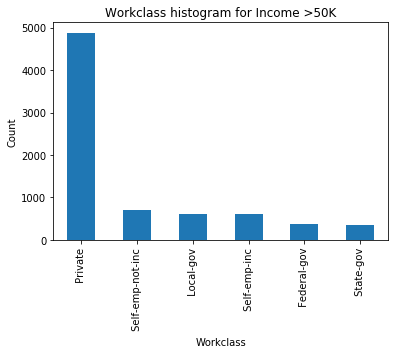

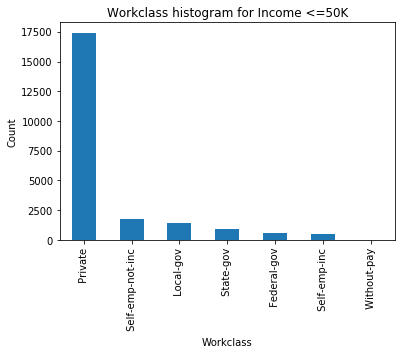

In [88]:
# Workclass - positive
plt.figure(0)
pos_data_concat['workclass'].value_counts().plot(kind='bar')
plt.title('Workclass histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Workclass')

# Workclass - negative
plt.figure(1)
neg_data_concat['workclass'].value_counts().plot(kind='bar')
plt.title('Workclass histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Workclass')


The workclass doesn't seem to be an important feature 

Text(0.5, 0, 'Occupation')

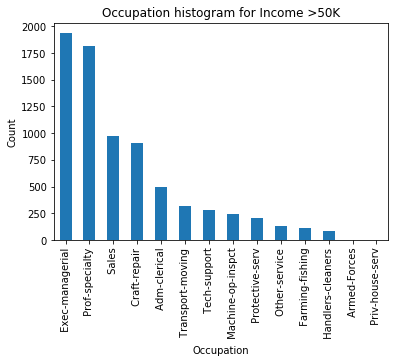

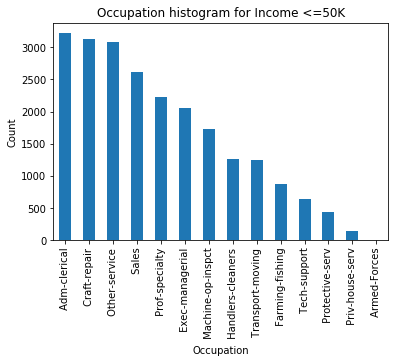

In [89]:
# Occupation - positive 
plt.figure(0)
pos_data_concat['occupation'].value_counts().plot(kind='bar')
plt.title('Occupation histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Occupation')

# Workclass - negative
plt.figure(1)
neg_data_concat['occupation'].value_counts().plot(kind='bar')
plt.title('Occupation histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Occupation')

Text(0.5, 0, 'Sex')

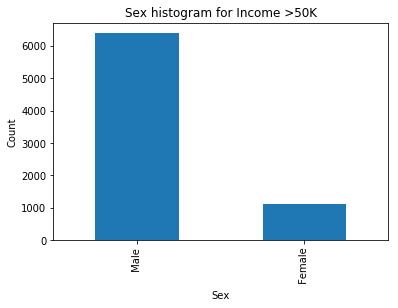

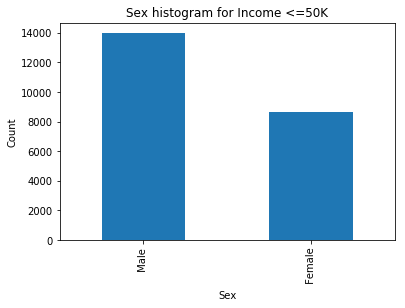

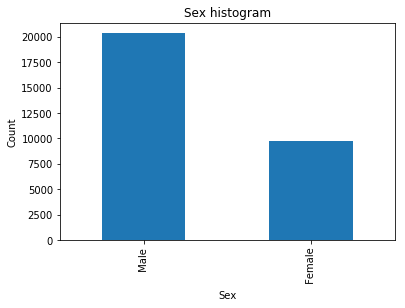

In [156]:
# Sex - positive 
plt.figure(0)
pos_data_concat['sex'].value_counts().plot(kind='bar')
plt.title('Sex histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Sex')

# Sex - negative
plt.figure(1)
neg_data_concat['sex'].value_counts().plot(kind='bar')
plt.title('Sex histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Sex')

# Sex - total
plt.figure(2)
df_concat['sex'].value_counts().plot(kind='bar')
plt.title('Sex histogram')
plt.ylabel('Count')
plt.xlabel('Sex')


Text(0.5, 0, 'Race')

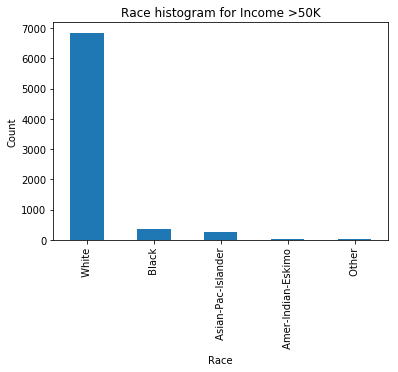

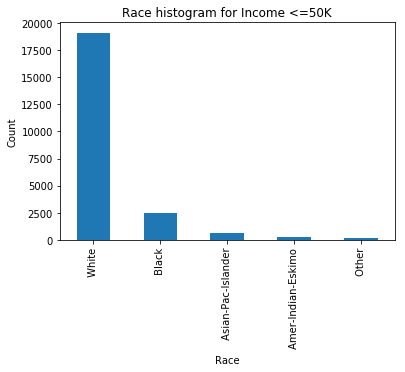

In [91]:
# Race - positive 
plt.figure(0)
pos_data_concat['race'].value_counts().plot(kind='bar')
plt.title('Race histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Race')

# Race - negative
plt.figure(1)
neg_data_concat['race'].value_counts().plot(kind='bar')
plt.title('Race histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Race')

The majority of the data was collected from white people, so it makes sense that the histogram shows a bias towards race= white.

This feature might not be useful because it is biased?

Text(0.5, 0, 'Relationship')

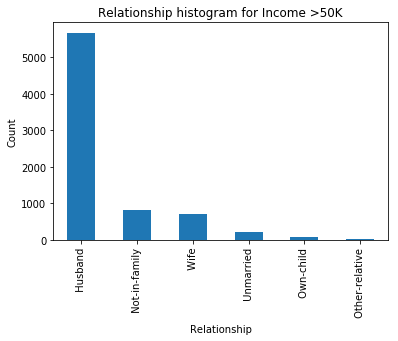

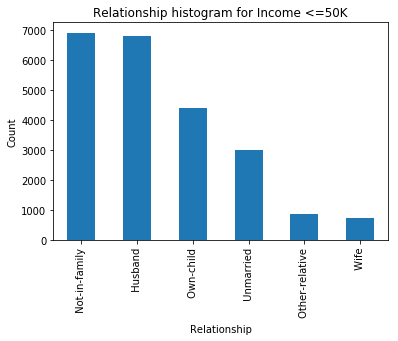

In [92]:
# Relationship - positive 
plt.figure(0)
pos_data_concat['relationship'].value_counts().plot(kind='bar')
plt.title('Relationship histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Relationship')

# Relationship - negative
plt.figure(1)
neg_data_concat['relationship'].value_counts().plot(kind='bar')
plt.title('Relationship histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Relationship')

Text(0.5, 0, 'Country')

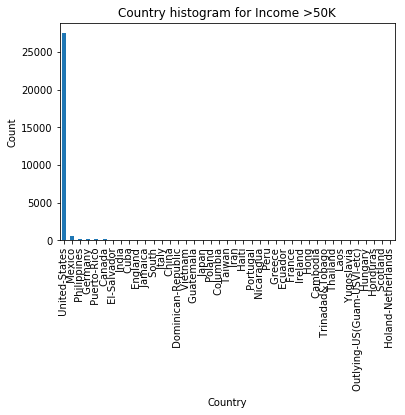

In [102]:
plt.figure(0)
df_concat['native-country'].value_counts().plot(kind='bar')
plt.title('Country histogram')
plt.ylabel('Count')
plt.xlabel('Country')


## Split Data between Training and Test Data (80/20 split)


In [10]:
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df_final.copy()
train_set = data_copy.sample(frac=0.80, random_state=0) #random state = 0 means the split will be zero each run
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = int)
y_train = np.array(train_set["income_ >50K"], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = int)
y_test = np.array(test_set["income_ >50K"], dtype = int)

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (24130, 61)
y_train size:  (24130,)
x_test size:  (6032, 61)
y_test size:  (6032,)
